
**CNN :** basically for image precessing

**RNN :** basically for nlp
we are genrating our data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

import warnings
warnings.filterwarnings('ignore')

In [26]:
#generate yime series sample data
N=1000
Tp=800
t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df=pd.DataFrame(x)
df.head(20)

,0
0,0.291052
1,0.132134
2,0.861724
3,1.102065
4,0.173260
5,0.445218
6,0.834656
7,1.499956
8,0.164172
9,0.469243


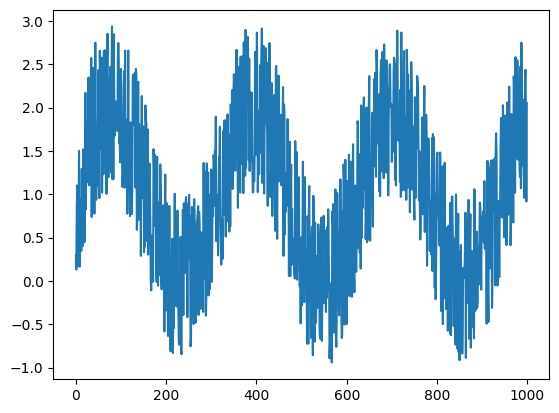

In [27]:
#plot them
plt.plot(df)
plt.show()

In [28]:
#split dataset into traing and testing part
values=df.values
train,test=values[0:Tp,:],values[Tp:N,:]

**df.values** retrieves the data from the DataFrame as a NumPy array, which is necessary because RNNs typically work with numerical arrays.

**Splitting into Train and Test:**

This code splits the dataset based on index values Tp and N.

Tp is the point where the training data ends (typically 70-80% of the dataset).

N represents the total number of data points.

The train dataset includes all rows from index 0 to Tp.

The test dataset contains the rows from Tp to N.

In [29]:
#add step element into train and test
step=4
test=np.append(test,np.repeat(test[-1,],step))
train=np.append(train,np.repeat(train[-1,],step))

In [30]:
#convert into dataset matrix
def converttomatrix(data,step):
    x,y=[],[]
    for i in range(len(data)-step):
        d=i+step
        x.append(data[i:d,])
        y.append(data[d,])

    return np.array(x),np.array(y) #convert data into np_array
trainX,trainY=converttomatrix(train,step)
testX,testY=converttomatrix(test,step)


In [31]:
#reshape tainX and testX to fit with the keras model,RNN model requires 3D input data
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))
trainX.shape
testX.shape

(200, 1, 4)

**Models like RNNs or LSTMs** expect input in a specific format, often 3D: (samples, timesteps, features). Reshaping ensures the data matches this structure.

In [32]:
#building a model with Simple RNN
#simple RNN
model=Sequential()
model.add(SimpleRNN(32,input_shape=(1,step),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 32)                  │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457 (5.69 KB)

 Trainable params: 1,457 (5.69 KB)

 Non-trainable params: 0 (0.00 B)

**model = Sequential()**

Initializes a sequential model, which allows layers to be added one after the other in a linear stack.

**model.add(SimpleRNN(32, input_shape=(1,** **step), activation='relu'))**

Adds a Simple RNN layer to the model:

**32:** The number of units (or neurons) in the RNN layer, which determines the layer's capacity to capture temporal patterns.

**input_shape=(1, step):** Specifies the shape of the input data.

**1 :** Represents the number of features (in time series, it's often 1 feature per timestep).

**step:** The number of time steps to look back (how many steps the model should consider at a time).

**activation='relu':** Applies the ReLU activation function, which adds non-linearity and helps the model learn complex patterns.
model.add(Dense(8, activation='relu'))

**Adds a Dense (fully connected) layer:**

**8 :**The number of units in this dense layer.

**activation='relu':** Uses the ReLU activation again to add non-linearity.
model.add(Dense(1))

**Adds another Dense layer:**
1: This is the output layer, with a single neuron (since you likely want to predict a single value, such as in time-series regression).

model.compile(loss='mean_squared_error', optimizer='rmsprop')

Compiles the model, specifying:

**loss='mean_squared_error':** The loss function is Mean Squared Error (MSE), commonly used for regression tasks.

**optimizer='rmsprop':** The optimizer RMSprop adjusts the learning rate during training for efficient optimization.

In [35]:
#predicting and plotting the result
#fit the model with trainX data and predict testX data
testpredict=model.predict(testX)
trainpredict=model.predict(trainX)
predicted=np.concatenate((trainpredict,testpredict),axis=0)
predicted.shape

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(1000, 1)

**Explanation of output**

7/7 ━━━━━ 0s 2ms/step and 25/25 ━━━━━ 0s 1ms/step: These indicate that the model processed 7 batches for testX and 25 batches for trainX, with each batch taking 1-2 milliseconds per step.

In [39]:
#check the loss
trainloss=model.evaluate(trainX,trainY,verbose=0)
testloss=model.evaluate(testX,testY,verbose=0)
print(testloss)
print(trainloss)

1.102351188659668
1.8007549047470093
